In [2]:
import pandas as pd

In [3]:
df_adi = pd.read_pickle("all_adi.pkl")
df_adi.head()

,2001_cc_code,VILL_CODE_2001,DIST_CODE_2001,STATE_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2011,distance_district_centre,dc_score_none_none_old,inverted_dist,...,MSW_2011,BF_2019,FC_2019,MSW_2019,ASSET_2019,LIT_2019,ADI_2019,distance_district_centre_2011,distance_district_centre_2001,distance_district_centre_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,00000500,1,3,27378,35,3,6.111495,0.407427,0.163626,...,3,1,3,3,3,3,13,12.649933,18.486986,5.206159
27379,301000100000600,00000600,1,3,27379,35,3,4.878376,0.658831,0.204986,...,3,1,3,3,3,3,13,14.572395,18.362553,4.918317
27380,301000100000700,00000700,1,3,27380,35,3,9.103092,0.080571,0.109853,...,3,1,3,3,3,3,13,13.711089,15.550183,4.686912
27381,301000100000800,00000800,1,3,27381,35,3,6.777262,0.309724,0.147552,...,3,1,1,3,3,3,11,15.224204,16.427983,6.789658
27382,301000100000900,00000900,1,3,27382,35,3,6.786058,0.308561,0.147361,...,3,1,3,3,3,3,13,16.919512,16.081710,6.719902


In [4]:
df_adi_corrected = df_adi[df_adi["ADI_2001"]<11]
print(df_adi_corrected["ADI_2001"].mean(), df_adi_corrected["ADI_2011"].mean(), df_adi_corrected["ADI_2019"].mean())

7.946337176981152 8.783236196043973 8.466542330936283


[Text(0, 0.5, 'Density of Villages'), Text(0.5, 0, 'ADI2019 - ADI2011')]

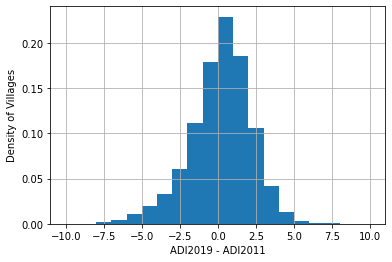

In [5]:
(df_adi_corrected["ADI_2019"] - df_adi_corrected["ADI_2011"]).hist(density = True, bins = 20, alpha = 1).set(ylabel="Density of Villages", xlabel = "ADI2019 - ADI2011")

In [6]:
(df_adi_corrected["ADI_2019"] - df_adi_corrected["ADI_2011"]).describe()

count    278815.000000
mean         -0.316694
std           2.034386
min         -10.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          10.000000
dtype: float64

[Text(0, 0.5, 'Density of Villages'),
 Text(0.5, 0, 'ADI2011 for the villages that show decrement in ADI')]

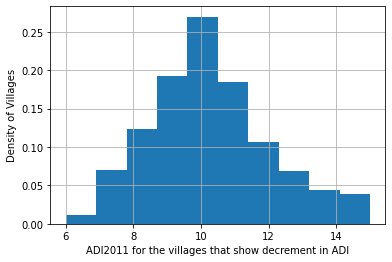

In [7]:
df_adi_corrected[df_adi_corrected["ADI_2019"]<df_adi_corrected["ADI_2011"]]["ADI_2011"].hist(density=True).set(ylabel="Density of Villages", xlabel = "ADI2011 for the villages that show decrement in ADI")

In [9]:
df_adi_corrected[df_adi_corrected["ADI_2019"]<df_adi_corrected["ADI_2011"]].groupby('STATE_CODE_2011').agg("count")[["DIST_CODE_2001"]]

,DIST_CODE_2001
STATE_CODE_2011,
3,697
6,275
8,8167
9,27860
10,6764
20,4966
21,9254
22,5871
23,14229


In [10]:
result = pd.concat([df_adi_corrected.groupby('STATE_CODE_2011').agg("count")[["DIST_CODE_2001"]], df_adi_corrected[df_adi_corrected["ADI_2019"]<df_adi_corrected["ADI_2011"]].groupby('STATE_CODE_2011').agg("count")[["DIST_CODE_2001"]]], axis=1)

In [11]:
result.to_csv("StateWise_NegativeDevelopment.csv")

In [12]:
df_adi_corrected.groupby('STATE_CODE_2011').agg('mean')[["ADI_2001","ADI_2011","ADI_2019"]].to_csv("StateWise_AggregateADI.csv")

In [13]:
df_adi.columns

Index(['2001_cc_code', 'VILL_CODE_2001', 'DIST_CODE_2001', 'STATE_CODE_2001',
       'VILL_CODE_2011', 'DIST_CODE_2011', 'STATE_CODE_2011',
       'distance_district_centre', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019', 'P_LIT_2011', 'M_LIT_2011', 'F_LIT_2011',
       'P_ILL_2011', 'M_ILL_2011', 'F_ILL_2011', 'literacy_percent_2011',
       'P_ST_2011', 'P_SC_2011', 'P_SC_2001', 'P_ST_2001', 'BF_2001',
       'FC_2001', 'MSW_2001', 'ASSET_2001', 'LIT_2001', 'ADI_2001', 'ADI_2011',
       'BF_2011', 'FC_2011', 'ASSET_2011', 'LIT_2011', 'MSW_2011', 'BF_2019',
       'FC_2019', 'MSW_2019', 'ASSET_2019', 'LIT_2019', 'ADI_2019',
       'distance_district_centre_2011', 'distance_district_centre_2001',
       'distance_district_centre_2019'],
      dtype='object')

In [14]:
df_gini = pd.read_pickle("all_gini.pickle")
df_gini.columns

Index(['Gini_2001', 'Population_sum_2001', 'Adi_product_population_sum_2001',
       'Average_ADI_per_population_2001', 'Num_villages_in_District_2001',
       'Gini_2011', 'Population_sum_2011', 'Adi_product_population_sum_2011',
       'Average_ADI_per_population_2011', 'Num_villages_in_District_2011',
       'Gini_2019', 'Population_sum_2019', 'Adi_product_population_sum_2019',
       'Average_ADI_per_population_2019', 'Num_villages_in_District_2019'],
      dtype='object')

In [15]:
df_gini.head()

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   

                                Adi_product_population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 17278863.0   
                37.0                                 13165768.0   
                38.0                                 16021021.0   
                39.0                                  6398959.0   
                40.0                                  4671674.0   

                                Average_ADI_per_population_2011  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  13.081624   
                37.0                                  13.961504   
                38.0                                  13.957830   
                39.0                                  13.912353   
                40.0                                  13.644266   

                                Num_villages_in_District_2011  Gini_2019  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047450   
                37.0                                    829.0   0.051354   
                38.0                                   1233.0   0.060786   
                39.0                                    417.0   0.048773   
                40.0                                    355.0   0.033202   

                                Population_sum_2019  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1498899.0   
                37.0                      1010984.0   
                3

In [16]:
print(df_gini["Gini_2001"].mean(), df_gini["Gini_2011"].mean(), df_gini["Gini_2019"].mean())

0.07407280082541941 0.090999191263894 0.07336753146966483


In [17]:
df_gini.groupby('STATE_CODE_2011').agg('mean')[["Gini_2001","Gini_2011","Gini_2019"]].to_csv("StateWise_Gini.csv")

In [18]:
adi_relevant = df_adi[["ADI_2001","ADI_2011","ADI_2019"]]

In [19]:
adi_relevant.shape

(305457, 3)

In [20]:
adi_relevant[adi_relevant.ADI_2019 < adi_relevant.ADI_2011].describe()

,ADI_2001,ADI_2011,ADI_2019
count,131007.000000,131007.000000,131007.000000
mean,8.537719,10.490600,8.252826
std,1.902974,2.078193,1.497179
min,5.000000,6.000000,5.000000
25%,7.000000,9.000000,7.000000
50%,8.000000,10.000000,8.000000
75%,9.000000,12.000000,9.000000
max,15.000000,15.000000,14.000000


In [21]:
adi_relevant_corrected = adi_relevant[abs(adi_relevant.ADI_2001 - adi_relevant.ADI_2011)<=2]

<AxesSubplot:>

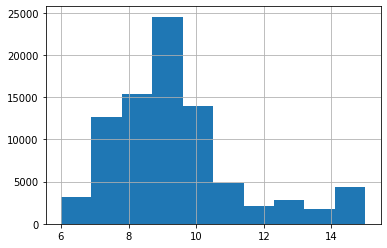

In [22]:
adi_relevant[adi_relevant.ADI_2001 > adi_relevant.ADI_2011]["ADI_2001"].hist()

In [23]:
adi_relevant_corrected = adi_relevant_corrected[abs(adi_relevant_corrected.ADI_2011 - adi_relevant_corrected.ADI_2019)<=2]

In [24]:
adi_relevant_corrected.describe()

,ADI_2001,ADI_2011,ADI_2019
count,213611.000000,213611.000000,213611.000000
mean,8.210794,8.403832,8.450782
std,1.682934,1.718605,1.596485
min,5.000000,5.000000,5.000000
25%,7.000000,7.000000,7.000000
50%,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000
max,15.000000,15.000000,15.000000


[ 5.    5.01  5.02 ... 14.98 14.99 15.  ]
[ 5.    5.01  5.02 ... 14.98 14.99 15.  ]
[ 5.    5.01  5.02 ... 14.98 14.99 15.  ]


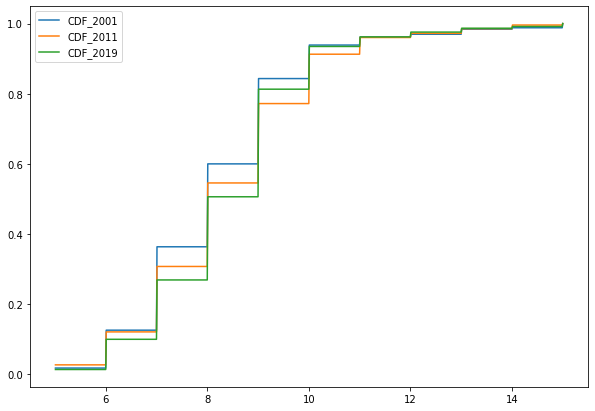

In [26]:

# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
  
fig = plt.figure(figsize =(10, 7))
# getting data of the histogram
count, bins_count = np.histogram(adi_relevant_corrected["ADI_2001"], bins=1000)
print(bins_count)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
plt.plot(bins_count[1:], cdf, label="CDF_2001")

count, bins_count = np.histogram(adi_relevant_corrected["ADI_2011"], bins=1000)
print(bins_count)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
plt.plot(bins_count[1:], cdf, label="CDF_2011")

count, bins_count = np.histogram(adi_relevant_corrected["ADI_2019"], bins=1000)
print(bins_count)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
plt.plot(bins_count[1:], cdf, label="CDF_2019")

plt.legend()

plt.show()

In [1]:
import pandas as pd
df_population = pd.read_pickle("pop_data/population_2011.pickle")

In [2]:
df_population.head()

,pop,hh,log_pop,sqrt_pop,log_hh,sqrt_hh
Village_ID,,,,,,
27378,-0.362916,-0.323749,-0.039997,-0.286324,0.007857,-0.234668
27379,-0.405461,-0.359134,-0.119441,-0.359097,-0.056165,-0.294303
27380,0.612072,0.655232,0.929300,0.916267,0.975670,0.971300
27381,0.248667,0.257152,0.675470,0.536375,0.692629,0.551118
27382,0.453119,0.274845,0.826955,0.756620,0.707235,0.571260


In [3]:
df_population.describe()

,pop,hh,log_pop,sqrt_pop,log_hh,sqrt_hh
count,3.409530e+05,3.409530e+05,3.409530e+05,3.409530e+05,3.409530e+05,3.409530e+05
mean,-4.268012e-17,-1.067003e-17,-1.208381e-15,1.320416e-16,3.534448e-16,1.893930e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-8.657739e-01,-8.486241e-01,-6.111345e+00,-1.913704e+00,-4.778126e+00,-1.852749e+00
25%,-5.691412e-01,-5.537504e-01,-5.141780e-01,-6.766648e-01,-5.201258e-01,-6.698319e-01
50%,-2.849174e-01,-2.795178e-01,8.960707e-02,-1.604858e-01,8.210267e-02,-1.628682e-01
75%,2.102583e-01,1.952288e-01,6.439298e-01,4.928044e-01,6.396044e-01,4.793215e-01
max,3.816979e+01,4.513398e+01,3.874736e+00,1.286688e+01,4.129494e+00,1.433970e+01


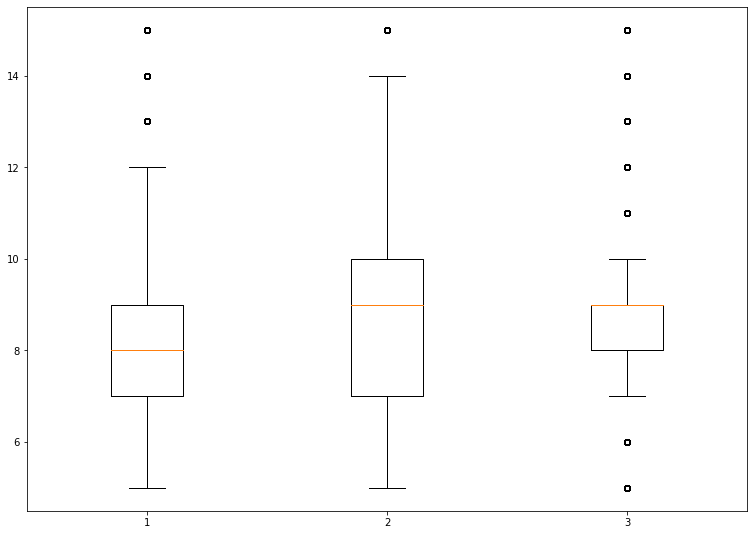

In [34]:
data_1 = adi_relevant["ADI_2001"]
data_2 = adi_relevant["ADI_2011"]
data_3 = adi_relevant["ADI_2019"]
data = [data_1, data_2, data_3]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()